In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

/home/amin/Software/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

('Train shape : ', (4209, 378))
('Test shape : ', (4209, 377))


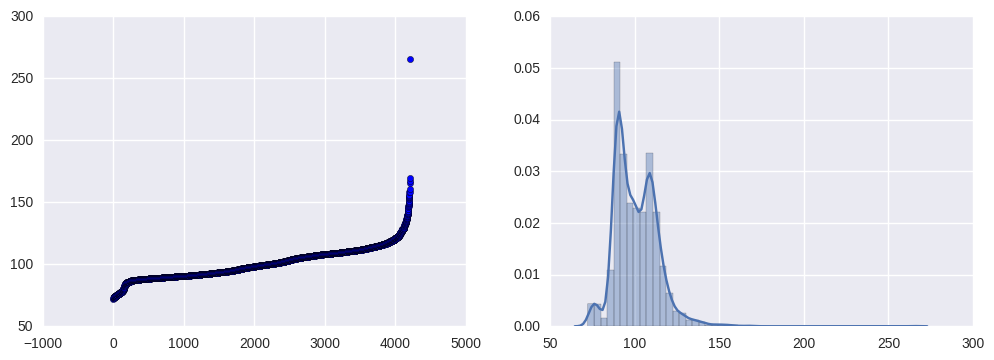

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(range(train.shape[0]), np.sort(train.y.values))

sns.distplot(train.y.values, bins=50, kde=True)
plt.show()

In [15]:
index = train.y.values < 250
train = train[index]
print("Train shape : ", train.shape)

('Train shape : ', (4208, 378))


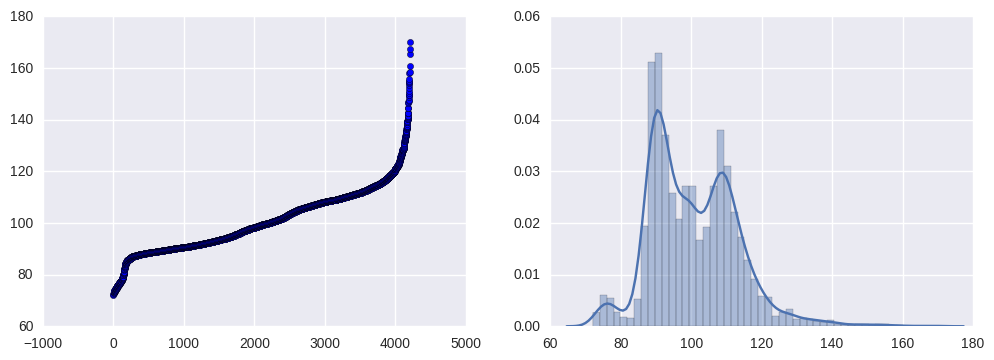

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(range(train.shape[0]), np.sort(train.y.values))

sns.distplot(train.y.values, bins=50, kde=True)
plt.show()

In [18]:
dtype = train.dtypes.reset_index()
dtype.columns = ["Count", "Column Type"]
dtype.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [22]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [23]:
unique_values_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

('Columns containing the unique values : ', '[0, 1]')
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144',

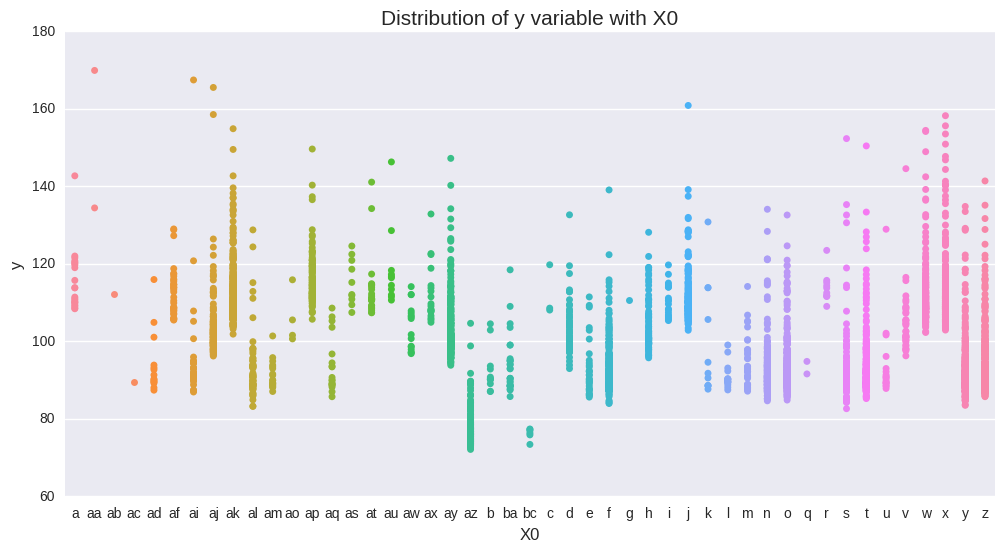

In [25]:
obj = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"] #object columns
var_name = "X0"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [31]:
X0_train_col = np.sort(train["X0"].unique()).tolist()
X0_test_col = np.sort(test["X0"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

not in test: aa
not in test: ab
not in test: ac
not in test: q
_______________
not in train: ae
not in train: ag
not in train: an
not in train: av
not in train: bb
not in train: p


In [41]:
X0_train = ["aa", "ab", "ac", "q"]
X0_test = ["ae", "ag", "an", "av", "bb", "p"]

print sum(train.X0.isin(X0_train))
print sum(test.X0.isin(X0_test))

6
6


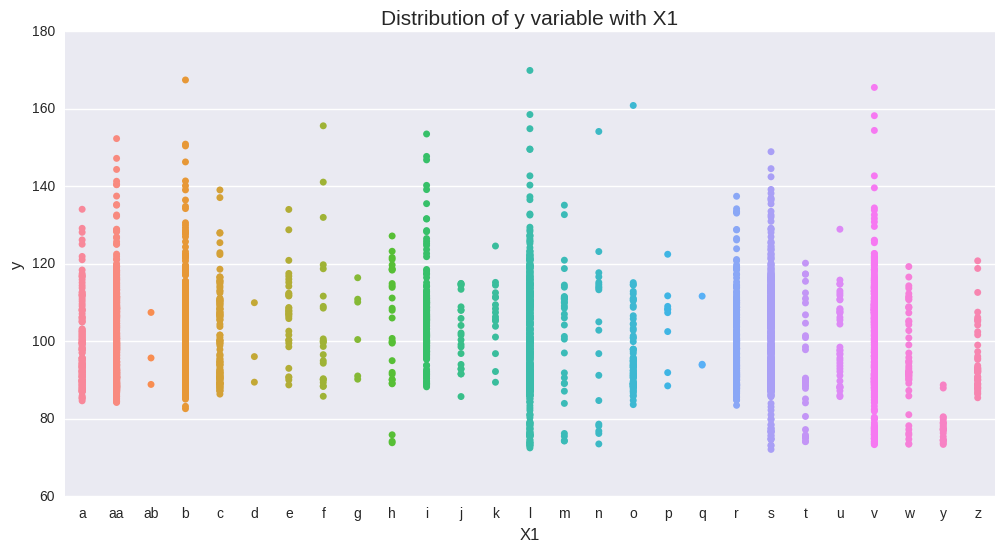

In [43]:
var_name = "X1"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [44]:
X0_train_col = np.sort(train["X1"].unique()).tolist()
X0_test_col = np.sort(test["X1"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

_______________


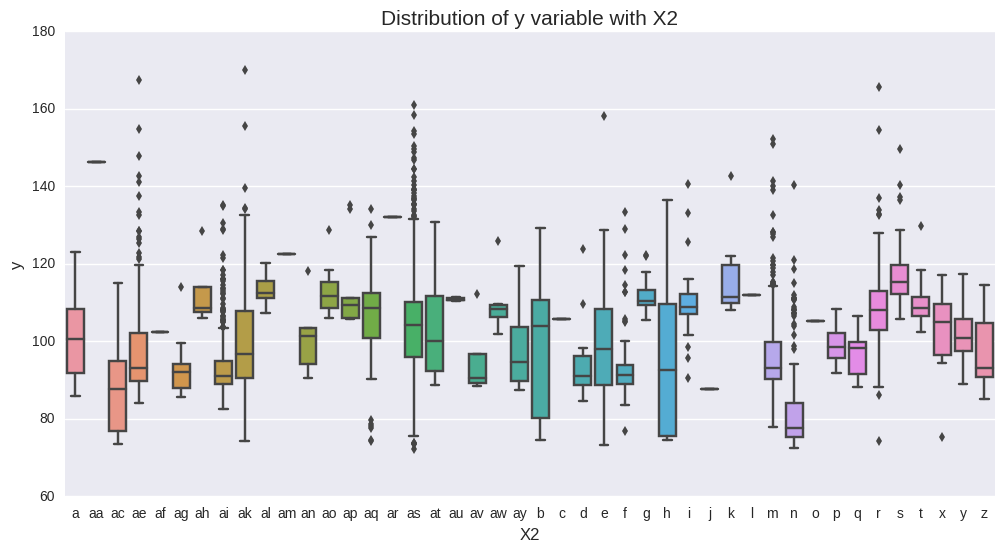

In [45]:
var_name = "X2"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [46]:
X0_train_col = np.sort(train["X2"].unique()).tolist()
X0_test_col = np.sort(test["X2"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

not in test: aa
not in test: ar
not in test: c
not in test: l
not in test: o
_______________
not in train: ab
not in train: ad
not in train: aj
not in train: ax
not in train: u
not in train: w


In [47]:
X0_train = ["aa", "ar", "c", "l", "o"]
X0_test = ["ab", "ad", "aj", "ax", "u", "w"]

print sum(train.X0.isin(X0_train))
print sum(test.X0.isin(X0_test))

290
400


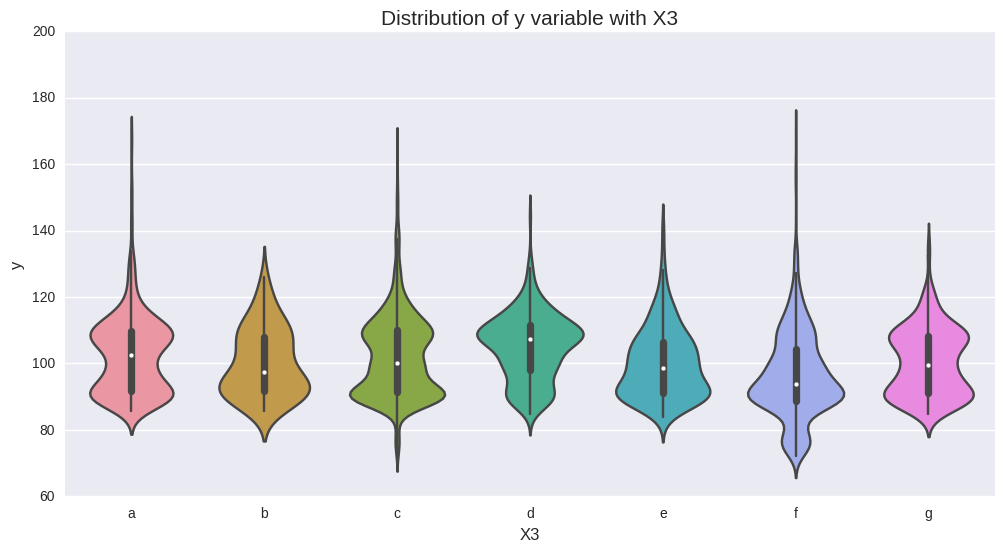

In [48]:
var_name = "X3"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [49]:
X0_train_col = np.sort(train["X3"].unique()).tolist()
X0_test_col = np.sort(test["X3"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

_______________


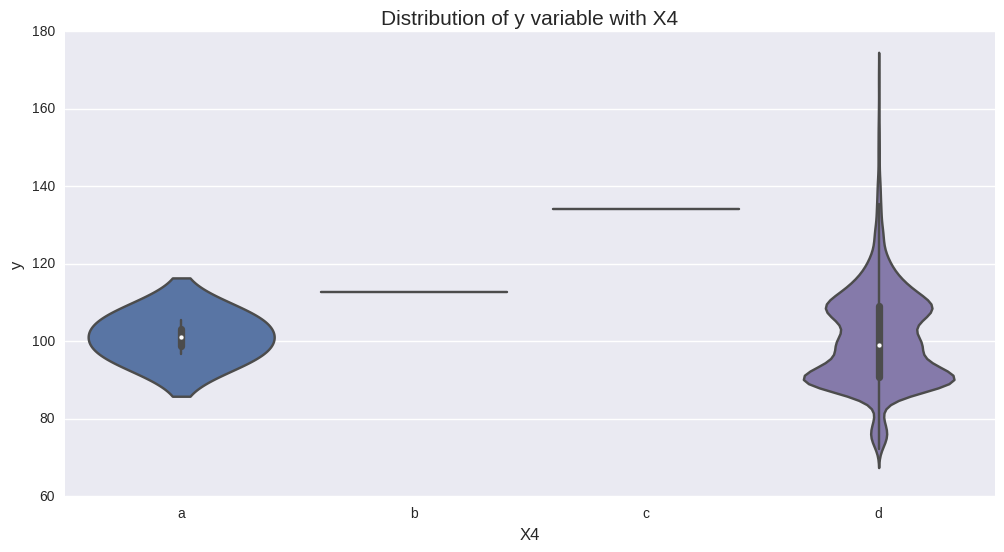

In [50]:
var_name = "X4"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [51]:
X0_train_col = np.sort(train["X4"].unique()).tolist()
X0_test_col = np.sort(test["X4"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

_______________


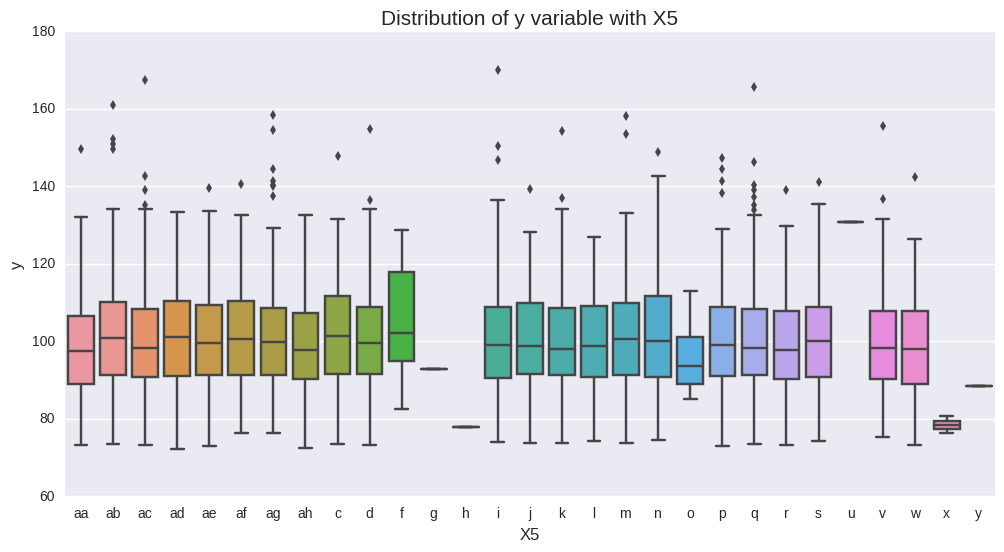

In [52]:
var_name = "X5"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [53]:
X0_train_col = np.sort(train["X5"].unique()).tolist()
X0_test_col = np.sort(test["X5"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

not in test: u
_______________
not in train: a
not in train: b
not in train: t
not in train: z


In [54]:
X0_train = ["u"]
X0_test = ["a", "b", "t", "z"]

print sum(train.X0.isin(X0_train))
print sum(test.X0.isin(X0_test))

17
659


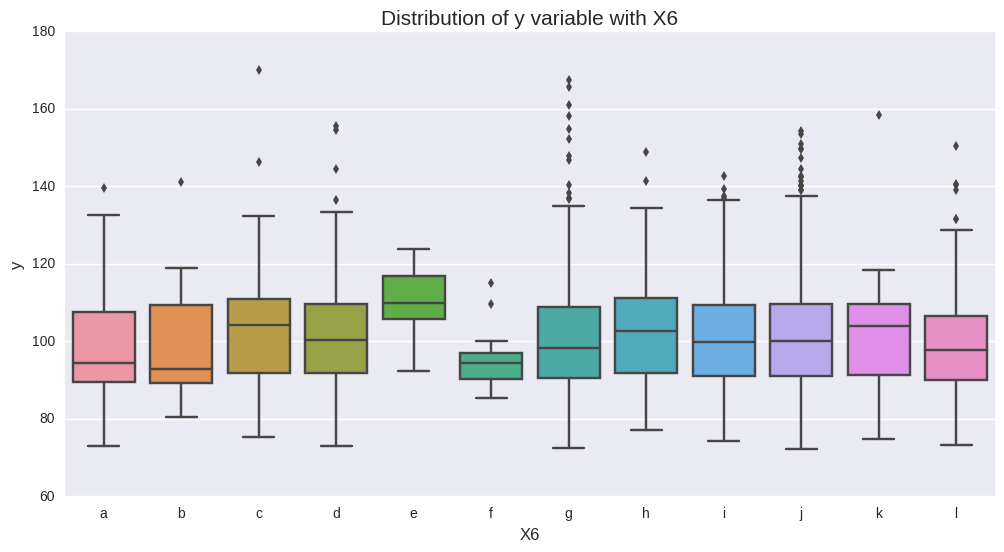

In [55]:
var_name = "X6"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [56]:
X0_train_col = np.sort(train["X6"].unique()).tolist()
X0_test_col = np.sort(test["X6"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

_______________


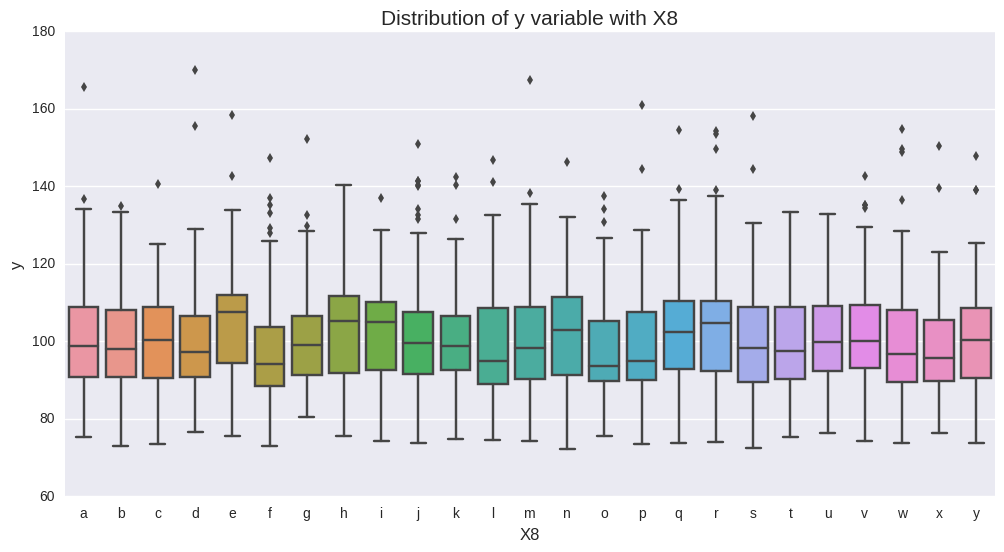

In [57]:
var_name = "X8"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

In [58]:
X0_train_col = np.sort(train["X8"].unique()).tolist()
X0_test_col = np.sort(test["X8"].unique()).tolist()

for ii in X0_train_col:
    if ii not in X0_test_col:
        print "not in test: " + ii
print "_______________"        
for ii in X0_test_col:
    if ii not in X0_train_col:
        print "not in train: " + ii

_______________
